<a href="https://colab.research.google.com/github/RosasGabriel/UFPB_ai_exam02/blob/main/AI_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

#Imports para préprocessamento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#Imports para método de Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dog_db = pd.read_csv('dog_database.csv')

# Prints para checagem de leitura do arquivo
# print(dog_db)
# print(dog_db.head())
# print(dog_db.shape)

ignored_columns = ['description', 'temperament', 'grooming_frequency_category', 'shedding_category', 'energy_level_category', 'trainability_category', 'demeanor_category']

dog_db = dog_db.drop(ignored_columns, axis=1) 
# print(dog_db)
print(dog_db.head())
print(dog_db.shape)

         Unnamed: 0 popularity  min_height  max_height  min_weight  \
0     Affenpinscher        148       22.86       29.21    3.175147   
1      Afghan Hound        113       63.50       68.58   22.679619   
2  Airedale Terrier         60       58.42       58.42   22.679619   
3             Akita         47       60.96       71.12   31.751466   
4  Alaskan Malamute         58       58.42       63.50   34.019428   

   max_weight  min_expectancy  max_expectancy          group  \
0    4.535924            12.0            15.0      Toy Group   
1   27.215542            12.0            15.0    Hound Group   
2   31.751466            11.0            14.0  Terrier Group   
3   58.967008            10.0            13.0  Working Group   
4   38.555351            10.0            14.0  Working Group   

   grooming_frequency_value  shedding_value  energy_level_value  \
0                       0.6             0.6                 0.6   
1                       0.8             0.2                 

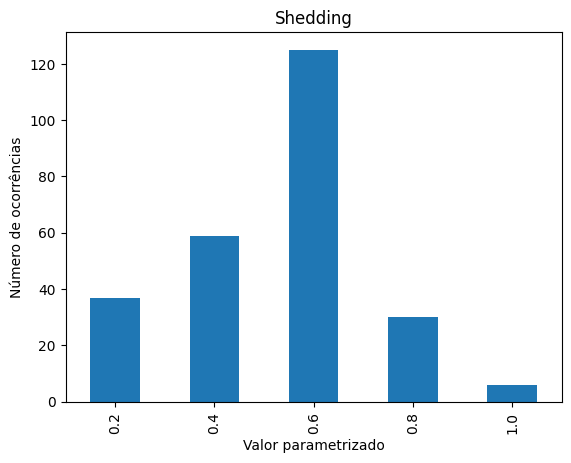

In [168]:
# Teste de organização de plotagem

shedding = dog_db['shedding_value']
count_shedding = shedding.value_counts().sort_index()

count_shedding.plot.bar(x=count_shedding.index)
plt.title("Shedding")
plt.xlabel("Valor parametrizado")
plt.ylabel("Número de ocorrências")
plt.show()

In [169]:
#Definição do atributo de saída

output_name = 'race'
dog_db = dog_db.rename(columns={dog_db.columns[0]: output_name})
# print(dog_db.columns)

In [170]:
#Retirada de atributos incompletos e codificação inteira

dog_db.dropna(inplace=True)
# print("----------------------------------------------------------------")
# print(dog_db)

int_encoder = LabelEncoder()
dog_db['group_value'] = int_encoder.fit_transform(dog_db['group'])

#Prints de testes para codificação da coluna 'groups'
# print(dog_db.head())
groups_val = int_encoder.classes_
print(groups_val)
uni_val = dog_db['group_value'].unique()
print(uni_val)

#Print para descobrir o valor atribuído a cada classe da coluna 'groups'
# for uni_val, groups_val in zip(dog_db['group_value'], dog_db['group']):
#   print(f'uni_val: {uni_val}, groups_val: {groups_val}')

print('Herding Group = 0\nHound Group = 1\nNon-Sporting Group = 2\nSporting Group = 3\nTerrier Group = 4\nToy Group = 5\nWorking Group = 6')

group_col = 'group'
dog_db = dog_db.drop(group_col, axis=1)
# print(dog_db.head())

['Herding Group' 'Hound Group' 'Non-Sporting Group' 'Sporting Group'
 'Terrier Group' 'Toy Group' 'Working Group']
[5 1 4 6 2 3 0]
Herding Group = 0
Hound Group = 1
Non-Sporting Group = 2
Sporting Group = 3
Terrier Group = 4
Toy Group = 5
Working Group = 6


In [171]:
#Normalização dos atributos

# dog_db['min_weight'] = dog_db['min_weight'].round(2)
# dog_db['max_weight'] = dog_db['max_weight'].round(2)
# print(dog_db.head())

# print(dog_db)

#Teste para descobrir qual coluna possuíam dados tipo 'string' qua não podiam ser tranformadas em float automaticamente pela função normalização
# for col_test in col_normalize:
#   if dog_db[col_test].dtype == object:
#     print(f"Coluna {col_test} contém string")

dog_db['popularity'] = pd.to_numeric(dog_db['popularity'], errors='coerce')

col_normalize = ['popularity', 'min_height', 'max_height', 'min_weight', 'max_weight', 'min_expectancy', 'max_expectancy', 'group_value']
scaler = MinMaxScaler()
dog_db[col_normalize] = scaler.fit_transform(dog_db[col_normalize])


# print(dog_db.head())

In [172]:
#Duplicação direta do banco de dados

double_dog = pd.concat([dog_db, dog_db], ignore_index=True)
#Prints de teste do banco de dados duplicado
# print("<------------------------------ Nova tabela ------------------------------>")
# print(double_dog.head())
# print("<------------------------------ Tamanho da tabela ------------------------------>")
# print(double_dog.shape)

# display(double_dog)

double_dog = double_dog.dropna()
display(double_dog)


,race,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,group_value
0,Affenpinscher,0.769634,0.16,0.18,0.046667,0.043478,0.800000,0.789474,0.6,0.6,0.6,0.8,1.0,0.833333
1,Afghan Hound,0.586387,0.80,0.80,0.333333,0.260870,0.800000,0.789474,0.8,0.2,0.8,0.2,0.2,0.166667
2,Airedale Terrier,0.308901,0.72,0.64,0.333333,0.304348,0.733333,0.736842,0.6,0.4,0.6,1.0,0.8,0.666667
3,Akita,0.240838,0.76,0.84,0.466667,0.565217,0.666667,0.684211,0.8,0.6,0.8,1.0,0.6,1.000000
4,Alaskan Malamute,0.298429,0.72,0.72,0.500000,0.369565,0.666667,0.736842,0.6,0.6,0.8,0.4,0.8,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,Wire Fox Terrier,0.523560,0.40,0.32,0.100000,0.078261,0.800000,0.789474,0.4,0.2,0.6,0.6,0.6,0.666667
372,Wirehaired Pointing Griffon,0.335079,0.60,0.68,0.233333,0.304348,0.800000,0.789474,0.4,0.6,1.0,0.6,0.6,0.500000
373,Wirehaired Vizsla,0.869110,0.66,0.72,0.300000,0.282609,0.800000,0.736842,0.2,0.6,0.8,0.6,0.6,0.500000
374,Xoloitzcuintli,0.727749,0.20,0.64,0.066667,0.239130,0.866667,0.947368,0.2,0.2,0.8,0.6,0.6,0.333333


<ipython-input-173-18ff2998825d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = double_dog.corr()


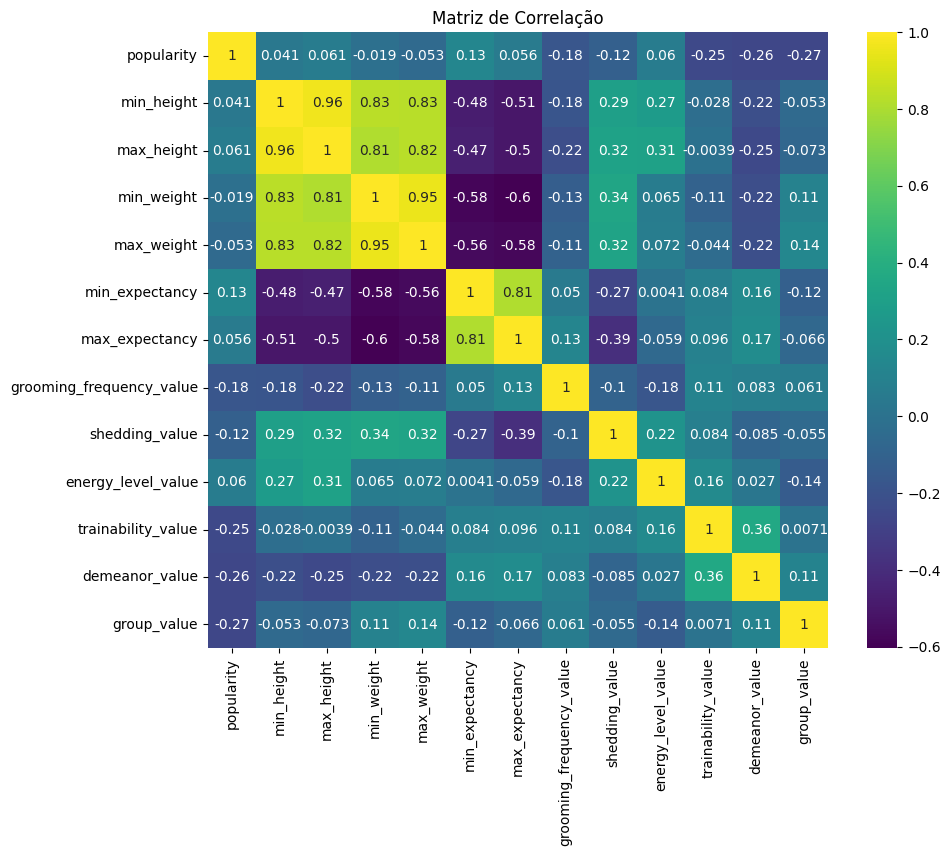

In [173]:
#Plotagem de gráficos relevantes

correlation_matrix = double_dog.corr()

plt.figure(figsize=(10,8))
sb.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Matriz de Correlação')
plt.show()

In [175]:
#Implementação da Árvore de Decisão

output = double_dog['race']
input = double_dog.drop('race', axis=1)

#Codificação do atributo de saída
race_encoder = LabelEncoder()
encoded_output = race_encoder.fit_transform(output)

#Testes para verificar a existência de valores NaN
# nan_indices = np.argwhere(input.isna().values)
# if nan_indices.size > 0:
#     print("Valores NaN encontrados em input:")
#     for index in nan_indices:
#         row, col = index[0], index[1]
#         print(f"Linha {row}, Coluna {col}: {input.iloc[row, col]}")
# else:
#     print("Não foram encontrados valores NaN em input")

#Valor arbitrário da 'seed' definido para 26
out_train, out_test, in_train, in_test = train_test_split(encoded_output, input, test_size=0.25, random_state=26)

#Prints de test para a divisão dos dados de treinamento e teste
# print("Saída de treinamento\n", out_train)
# print("------------------------------------------------")
# print("Entrada de trinamento\n", in_train)
# print("------------------------------------------------")
# print("Saída de teste\n", out_test)
# print("------------------------------------------------")
# print("Entrada de teste\n", in_test)

#Criação e treinamento do modelo de árvore de decisão
deci_model = DecisionTreeClassifier()
deci_model.fit(in_train, out_train)

#Previsão das raças dos cachorros
out_pred = deci_model.predict(in_test)

#Decodificação dos valores previstos
decoded_output = race_encoder.inverse_transform(out_pred)

#Avaliação da acurácia
deci_accuracy = accuracy_score(out_test, out_pred)
print("Acurácia: ", deci_accuracy)
print("Saída decodificada: ", decoded_output)

Acurácia:  0.7849462365591398
Saída decodificada:  ['Chihuahua' 'Curly-Coated Retriever' 'Dogue de Bordeaux' 'Mastiff'
 'Black Russian Terrier' 'Wire Fox Terrier' 'American English Coonhound'
 'Cirneco dell’Etna' 'Otterhound' 'Glen of Imaal Terrier'
 'Labrador Retriever' 'Bichon Frise' 'Borzoi' 'Yorkshire Terrier'
 'Swedish Vallhund' 'Lagotto Romagnolo' 'Airedale Terrier'
 'Norwegian Elkhound' 'Keeshond' 'Poodle (Toy)' 'Chesapeake Bay Retriever'
 'Scottish Deerhound' 'Mastiff' 'Boerboel' 'Boxer' 'Neapolitan Mastiff'
 'Collie' 'Rat Terrier' 'Poodle (Standard)' 'Black and Tan Coonhound'
 'Smooth Fox Terrier' 'Vizsla' 'German Wirehaired Pointer'
 'Parson Russell Terrier' 'Skye Terrier' 'Silky Terrier'
 'German Shorthaired Pointer' 'Puli' 'Berger Picard' 'Bergamasco Sheepdog'
 'Old English Sheepdog' 'Samoyed' 'Australian Cattle Dog'
 'Nova Scotia Duck Tolling Retriever' 'Bichon Frise' 'Akita' 'Mastiff'
 'Mastiff' 'Belgian Malinois' 'Icelandic Sheepdog' 'Australian Terrier'
 'Poodle (Standa